In [1]:
import argparse
import random
import numpy as np
import timeit
import matplotlib.pyplot as plt
import torch.backends.cudnn as cudnn
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image
import cv2
from cyclegan_pytorch import Generator

ModuleNotFoundError: ignored

In [ ]:
img_name = 'boris-kustodiev_24'
file="data/uki/test/A/"+img_name+".jpg"
mod_name="weights/ukiless/netG_A2B.pth"
mod2_name="weights/ukiless/netG_B2A.pth"
img_size=cv2.imread(file).shape[1]
print(img_size)

256


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cost 0.0248s
(256, 256, 3)


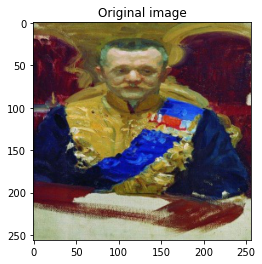

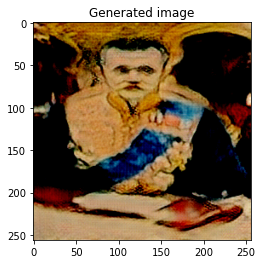

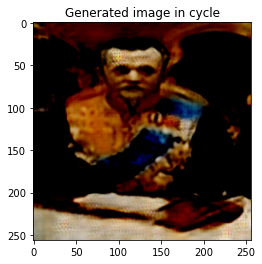

In [ ]:
random.seed(random.randint(1, 10000))
torch.manual_seed(random.randint(1, 10000))
cudnn.benchmark = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# create model
model = Generator().to(device)
model.load_state_dict(torch.load(mod_name))
model.eval()

model2 = Generator().to(device)
model2.load_state_dict(torch.load(mod2_name))
model2.eval()

# Load image
image = Image.open(file)
pre_process = transforms.Compose([transforms.Resize(img_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                                  ])
image = pre_process(image).unsqueeze(0)
image = image.to(device)

start = timeit.default_timer()
fake_image = model(image)
cycle_fake_image = model2(fake_image)
elapsed = (timeit.default_timer() - start)
print(f"cost {elapsed:.4f}s")
fake = np.moveaxis(fake_image.detach().cpu().numpy().squeeze(),0,-1)
fake_cycle = np.moveaxis(cycle_fake_image.detach().cpu().numpy().squeeze(),0,-1)
print(fake.shape)
plt.figure(1)
plt.imshow(plt.imread(file))
plt.title('Original image')
plt.figure(2)
plt.imshow(fake)
plt.title('Generated image')
plt.figure(3)
plt.imshow(fake_cycle)
plt.title('Generated image in cycle')
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#vutils.save_image(fake_image.detach(), "result.png", normalize=True)
